In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pycountry
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

import preprocess as pre

In [2]:
users_file = "BX-Users.csv"
books_file = "BX-Books.csv"
rating_file = "BX-Ratings.csv"
new_users_file = "BX-NewBooksUsers.csv"
new_books_file = "BX-NewBooks.csv"
new_ratings_file = "BX-NewBooksRatings.csv"

/Users/milesli/Desktop/Age-Based-Personalised-Books-Recommendation-System/Report&Coding/data&code/preprocess.py:177: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Book-Author"].fillna("NO AUTHOR", inplace=True)


,User-ID,User-City,User-State,User-Country,User-Age,Age-Group,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher,Rating_Category
0,131050,st. paul,minnesota,united states,5.0,0-10,0452272734,7,some girls,kristin mccloy,1995,plume books,high
1,120648,doylestown,pennsylvania,united states,5.0,0-10,0449203794,7,space,james a. michener,1988,fawcett books,high
2,123629,kingston,ontario,canada,5.0,0-10,0002005018,9,clara callan,richard bruce wright,2001,harperflamingo canada,high
3,214176,chicago,illinois,united states,5.0,0-10,0451207521,8,jackdaws,ken follett,2002,signet book,high
4,92366,berlin,berlin,germany,5.0,0-10,0345366638,6,american hero,larry beinhart,1994,ballantine books,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204159,114865,croydon,victoria,australia,97.0,90-100,0553271067,10,passages: predictable crises of adult life,gail sheehy,1984,bantam,high
204160,114865,croydon,victoria,australia,97.0,90-100,0749309423,9,the silence of the lambs,thomas harris,1991,mandarin,high
204161,228990,private,michigan,united states,99.0,90-100,0425122123,7,clear and present danger (jack ryan novels),tom clancy,1996,berkley publishing group,high
204162,228990,private,michigan,united states,99.0,90-100,044022165X,8,the rainmaker,john grisham,1996,dell,high


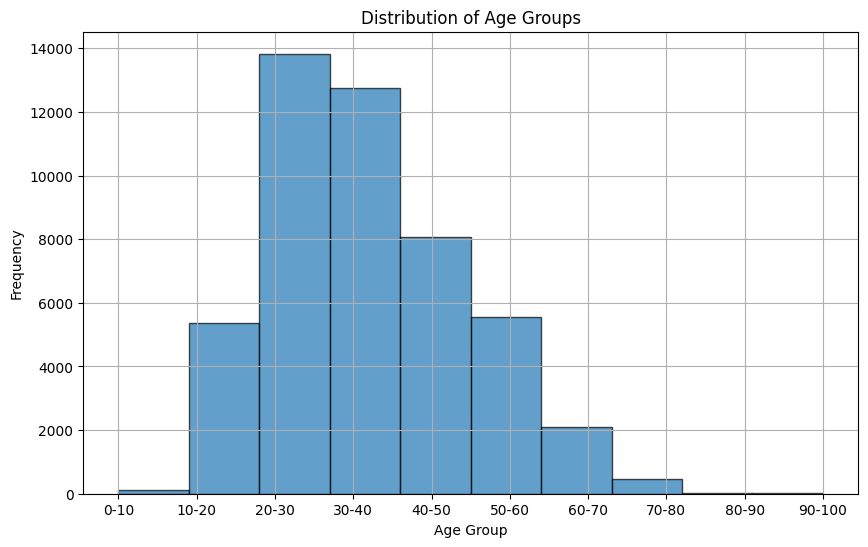

In [3]:
users_df = pd.read_csv(users_file)
ratings_df = pd.read_csv(rating_file)
books_df = pd.read_csv(books_file)

# Imputation missing data and discretise the age based on an age group
users_df = pre.ages_imputation(pre.weighted_age_dict(users_file), users_df)
users_df = pre.city_imputation(users_df)
users_df = pre.state_imputation(users_df)
users_df = pre.country_imputation(users_df)
merged_df = pre.discretising(users_df, ratings_df, books_df)
merged_df = pre.author_imputation(merged_df)
merged_df = pre.text_process(merged_df)
merged_df.to_csv("merge.csv", index=False)

merged_df

Text processing frist step: Write everyting into uppercase, unitify the counties of users.

# For Test Set

/Users/milesli/Desktop/Age-Based-Personalised-Books-Recommendation-System/Report&Coding/data&code/preprocess.py:177: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Book-Author"].fillna("NO AUTHOR", inplace=True)


,User-ID,User-City,User-State,User-Country,User-Age,Age-Group,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher,Rating_Category
0,108141,los molinos,california,united states,5.0,0-10,0684143127,9,"ants, indians, and little dinosaurs",alan ternes,1975,scribner,high
1,104059,brisbane,queensland,australia,5.0,0-10,0345377672,8,body count,william x. kienzle,1993,fawcett books,high
2,104059,brisbane,queensland,australia,5.0,0-10,0451402049,8,midsummer magic,catherine coulter,1989,onyx books,high
3,248259,miami lakes,florida,united states,5.0,0-10,0312929641,8,the circle,david poyer,1993,st. martin's press,high
4,248259,miami lakes,florida,united states,5.0,0-10,0380713985,8,the blue deep,layne heath,1994,harper mass market paperbacks,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23140,181598,ardrossan,alberta,canada,85.0,80-90,1853267333,8,count of monte cristo,alexandre dumas,1998,ntc/contemporary publishing,high
23141,225867,despair,indiana,united states,93.0,90-100,0393322432,5,people who knock on the door,patricia highsmith,2001,w.w. norton & company,medium
23142,64417,goslar,niedersachsen,germany,95.0,90-100,3423107952,7,die unendliche geschichte,ende,0,deutscher taschenbuch verlag (dtv),high
23143,114865,croydon,victoria,australia,97.0,90-100,0586037950,9,the golden notebook,doris may lessing,1979,granada publishing,high


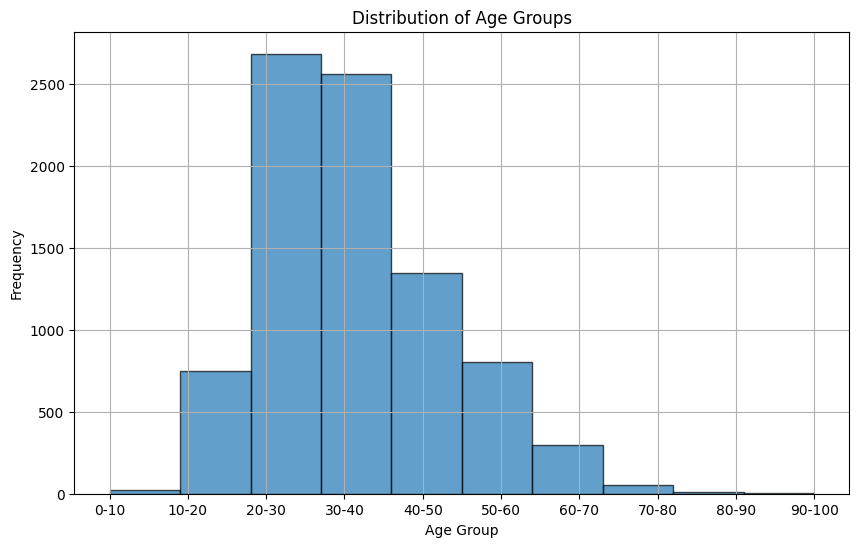

In [4]:
new_users_df = pd.read_csv(new_users_file)
new_ratings_df = pd.read_csv(new_ratings_file)
new_books_df = pd.read_csv(new_books_file)

# Imputation missing data and discretise the age based on an age group
new_users_df = pre.ages_imputation(pre.weighted_age_dict(new_users_file), new_users_df)
new_users_df = pre.city_imputation(new_users_df)
new_users_df = pre.state_imputation(new_users_df)
new_users_df = pre.country_imputation(new_users_df)
test_merged_df = pre.discretising(new_users_df, new_ratings_df, new_books_df)
test_merged_df = pre.author_imputation(test_merged_df)
test_merged_df = pre.text_process(test_merged_df)
test_merged_df

In [23]:
for feature in [
    "User-City",
    "User-State",
    "User-Country",
    "Age-Group",
    "Book-Author",
    "Year-Of-Publication",
    "Book-Publisher",
    "Book-Title"
]:
    print(
        feature,
        pre.compute_information_gain(
            merged_df[feature], merged_df["Rating_Category"]
        ).round(4),
    )

User-City 0.1038
User-State 0.0166
User-Country 0.0022
Age-Group 0.0008
Book-Author 0.0751
Year-Of-Publication 0.0027
Book-Publisher 0.0231
Book-Title 0.1435


In [46]:
# Deleted Features with low IG to train the DT
new_features = [
    "User-City",
    "Book-Author",
    "Book-Title",
]

train_X = OrdinalEncoder().fit_transform(merged_df[new_features])
train_y = OrdinalEncoder().fit_transform(merged_df[["Rating_Category"]])

test_X = OrdinalEncoder().fit_transform(test_merged_df[new_features])
test_y = OrdinalEncoder().fit_transform(test_merged_df[["Rating_Category"]])

# Initialise the DT
dt_classifier = DecisionTreeClassifier(criterion="entropy")

# Train the model
dt_classifier.fit(train_X, train_y)

# Do Cross validation to test the training process
cross_validation = cross_val_score(dt_classifier, train_X, train_y, cv=10)
print("Cross Validation Scores:", cross_validation)
print("Average Score:", np.mean(cross_validation))

pred_y = dt_classifier.predict(test_X)

accuracy = accuracy_score(pred_y, test_y)
print("Final Accuracy:", accuracy)

Cross Validation Scores: [0.665132   0.66087084 0.64745065 0.66150757 0.65438871 0.54893221
 0.65414381 0.6473844  0.65012735 0.65522139]
Average Score: 0.6445158945872753
Final Accuracy: 0.6225102613955498


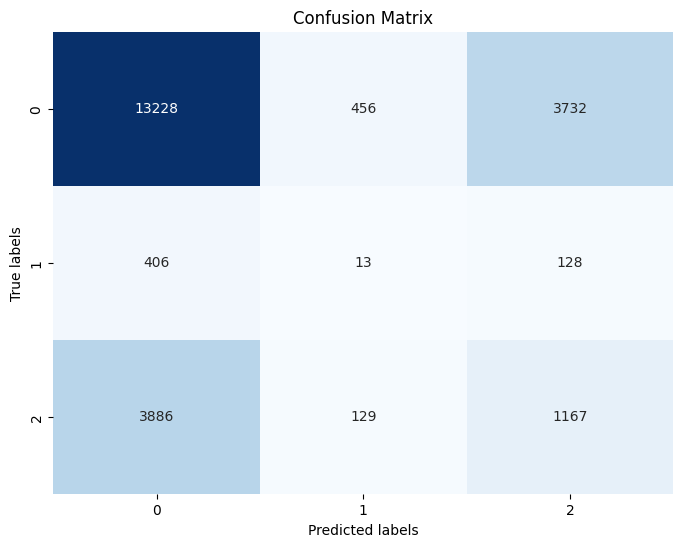

In [47]:
# Confusion matrix
cm = confusion_matrix(test_y, pred_y)

# Visulisation
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

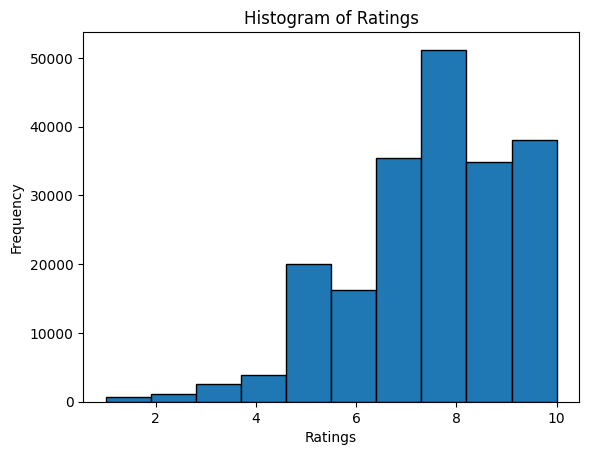

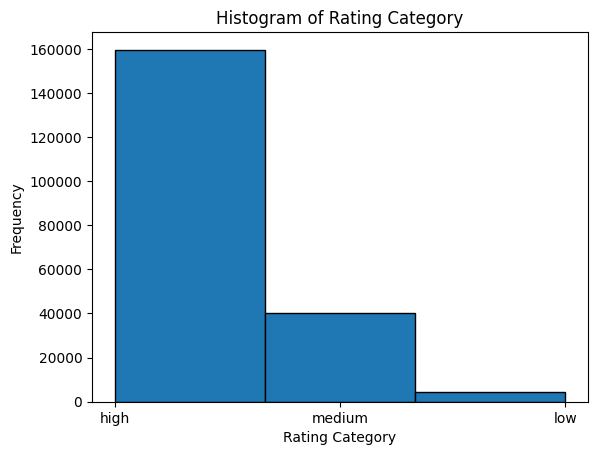

In [51]:
plt.hist(
    merged_df["Book-Rating"], bins=10, edgecolor="black"
)
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.title("Histogram of Ratings")
plt.show()

plt.hist(merged_df["Rating_Category"], bins=3, edgecolor="black")
plt.xlabel("Rating Category")
plt.ylabel("Frequency")
plt.title("Histogram of Rating Category")
plt.show()

## BOW vectors for books' name

In [22]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Assuming merged_df["Book-Title"] contains the book titles
book_names = set(merged_df["Book-Title"])

# Preprocessing and tokenization
def preprocess_text(text):
    # Remove punctuation and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text.lower())
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords and duplicates
    tokens = set([word for word in tokens if word not in stopwords.words('english')])
    return " ".join(tokens)

# Preprocess book names
preprocessed_books = [preprocess_text(book) for book in book_names]

# Creating bag-of-words vectors
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(preprocessed_books)

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/PY3/english.pickle[0m

  Searched in:
    - '/Users/milesli/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.12/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.12/share/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.12/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - '/Users/milesli/nltk_data'
    - '/Users/milesli/nltk_data'
    - '/Users/milesli/nltk_data'
    - '/Users/milesli/nltk_data'
    - '/Users/milesli/nltk_data'
    - '/Users/milesli/nltk_data'
    - '/Users/milesli/nltk_data'
    - '/Users/milesli/nltk_data'
    - '/Users/milesli/nltk_data'
    - '/Users/milesli/nltk_data'
    - '/Users/milesli/nltk_data'
    - '/Users/milesli/nltk_data'
    - '/Users/milesli/nltk_data'
    - '/Users/milesli/nltk'
    - ''
**********************************************************************


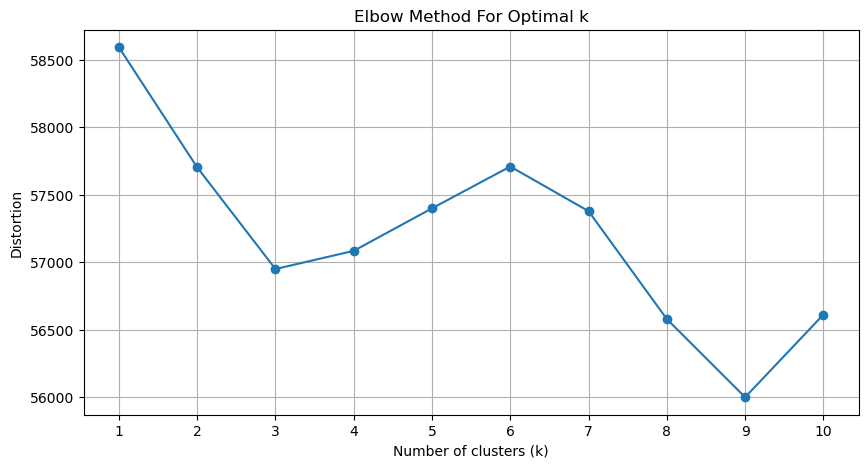

In [70]:
# Calculate distortion for a range of number of cluster
distortions = []
K_range = range(1, 11)  # Trying k from 1 to 10
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(bow_matrix)
    distortions.append(kmeans.inertia_)

# Plot the elbow
plt.figure(figsize=(10, 5))
plt.plot(K_range, distortions, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method For Optimal k')
plt.xticks(K_range)
plt.grid(True)
plt.show()

In [66]:
# Perform K-means clustering
num_clusters = 9  # You can adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(bow_matrix)

# Get cluster labels and assign each book to a cluster
cluster_labels = kmeans.labels_
book_clusters = {}
for i, book in enumerate(book_names):
    cluster = cluster_labels[i]
    if cluster not in book_clusters:
        book_clusters[cluster] = []
    book_clusters[cluster].append(book)

# Print out the clusters
for cluster, books in book_clusters.items():
    print(f"Cluster {cluster + 1}:")
    for book in books:
        print(f"- {book}")

Cluster 1:
- the velveteen rabbit (little golden book)
- le divorce (william abrahams book)
- the three bears (first little golden book)
- western garden book
- arrow's flight (the heralds of valdemar, book 2)
- prentice alvin (tales of alvin maker, book 3)
- eeyore, be happy (little golden book)
- fool moon (the dresden files, book 2)
- sylvia browne's book of angels
- when comes the spring (canadian west, book 2)
- the runelords: the sum of all men (the runelords, book one)
- convergence : book one of the blending (blending)
- onegai teacher book 1
- i spy mystery:  a book of picture riddles
- daughter of fortune : a novel (oprah's book club (hardcover))
- dune messiah (dune chronicles, book 2)
- catfantastic ii (daw book collectors)
- somebody's darling (a touchstone book)
- way of the peaceful warrior, 20th anniversary edition: a book that changes lives
- the fifth dominion (imajica, book 1)
- a game of thrones (a song of ice and fire, book 1)
- song of susannah (the dark tower, bo